## Decision tree for classification and regression tasks

### Motivation

- Classification Tree
- Regression Tree
- Separate training and testing
- Confusion Matrix
- Evaluation metrics: MAE and RMSE

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Load database

# Change work directory
import os

os.chdir("C:\\Users\\enzoa\OMNP\\PY\\Base de Dados")

df1 = pd.read_csv("bill_authentication.csv")

In [3]:
# About the database
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [4]:
df1.shape

(1372, 5)

In [5]:
df1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df1.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
# Split the data with the variables in x and the target in y
x1 = df1.drop('Class', axis = 1)
y1 = df1['Class']

In [13]:
# Check if it worked right
df1.columns[0:4]

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [15]:
x1.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [18]:
y1.count

<bound method Series.count of 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64>

In [26]:
# Split the data between train and test
# To do this we need the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30) # 30% of the database will be for the test

In [27]:
# Decision tree training for the classification task
from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier()

mod_arvore1.fit(x_train1, y_train1) # line in which trains the model (.fit)

DecisionTreeClassifier()

In [29]:
# Predictions for the test
y_pred_test1 = mod_arvore1.predict(x_test1)

In [31]:
# Evaluate the results
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("----------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[244   2]
 [  2 164]]

----------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       246
           1       0.99      0.99      0.99       166

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [35]:
# Accuracy
import sklearn.metrics as metrics

print("Acurácia:", round(metrics.accuracy_score(y_test1, y_pred_test1),4))

Acurácia: 0.9903


In [38]:
# To view your decision tree, follow these three steps, in this order:

# 1 - Download this file - https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# 2 - Install the graphviz and pydotplus libraries
# 3 - Run the following code every time you want to plot:

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [42]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=641cf1a241de68ce58a71ffc9f53ef38a58393b21c3c38980791d2067cc448da
  Stored in directory: c:\users\enzoa\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplusNote: you may need to restart the kernel to use updated packages.



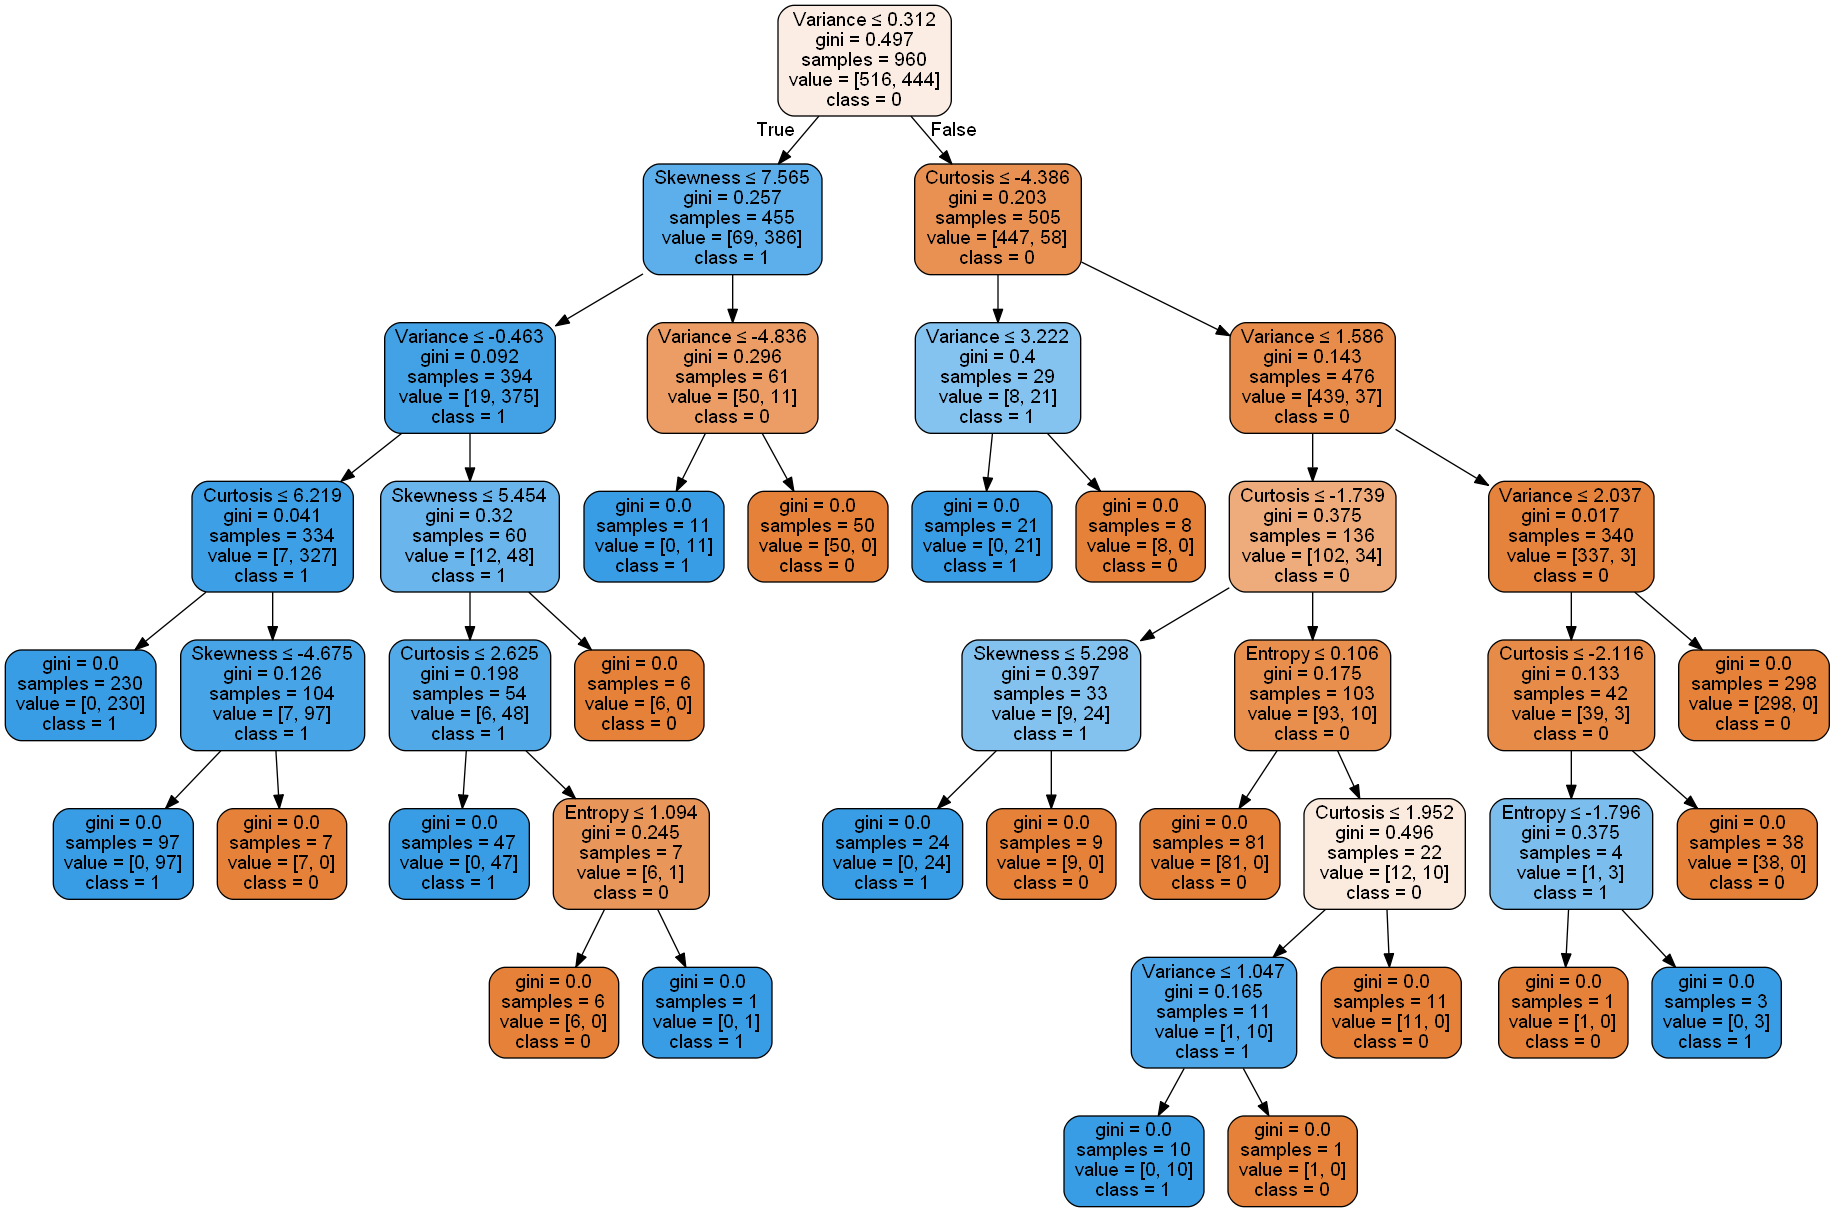

In [45]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

-------------------------------------

# Decision tree for regression task

In [46]:
# Load database
df2 = pd.read_csv("petrol_consumption.csv")

In [47]:
df2.shape

(48, 5)

In [48]:
df2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [49]:
df2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [50]:
# Split the data with the variables in x and the target in y
x2 = df2.drop('Petrol_Consumption', axis = 1)

y2 = df2['Petrol_Consumption']

In [51]:
# Split the data between train and test
# To do this we need the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.30, random_state = 0)

In [52]:
# Decision tree training for the regression task
# Be aware that we change the import we did from sklearn
from sklearn.tree import DecisionTreeRegressor

mod_arvore2 = DecisionTreeRegressor()

mod_arvore2.fit(x_train2, y_train2)

DecisionTreeRegressor()

In [53]:
# Predictions for the test
y_pred_test2 = mod_arvore2.predict(x_test2)

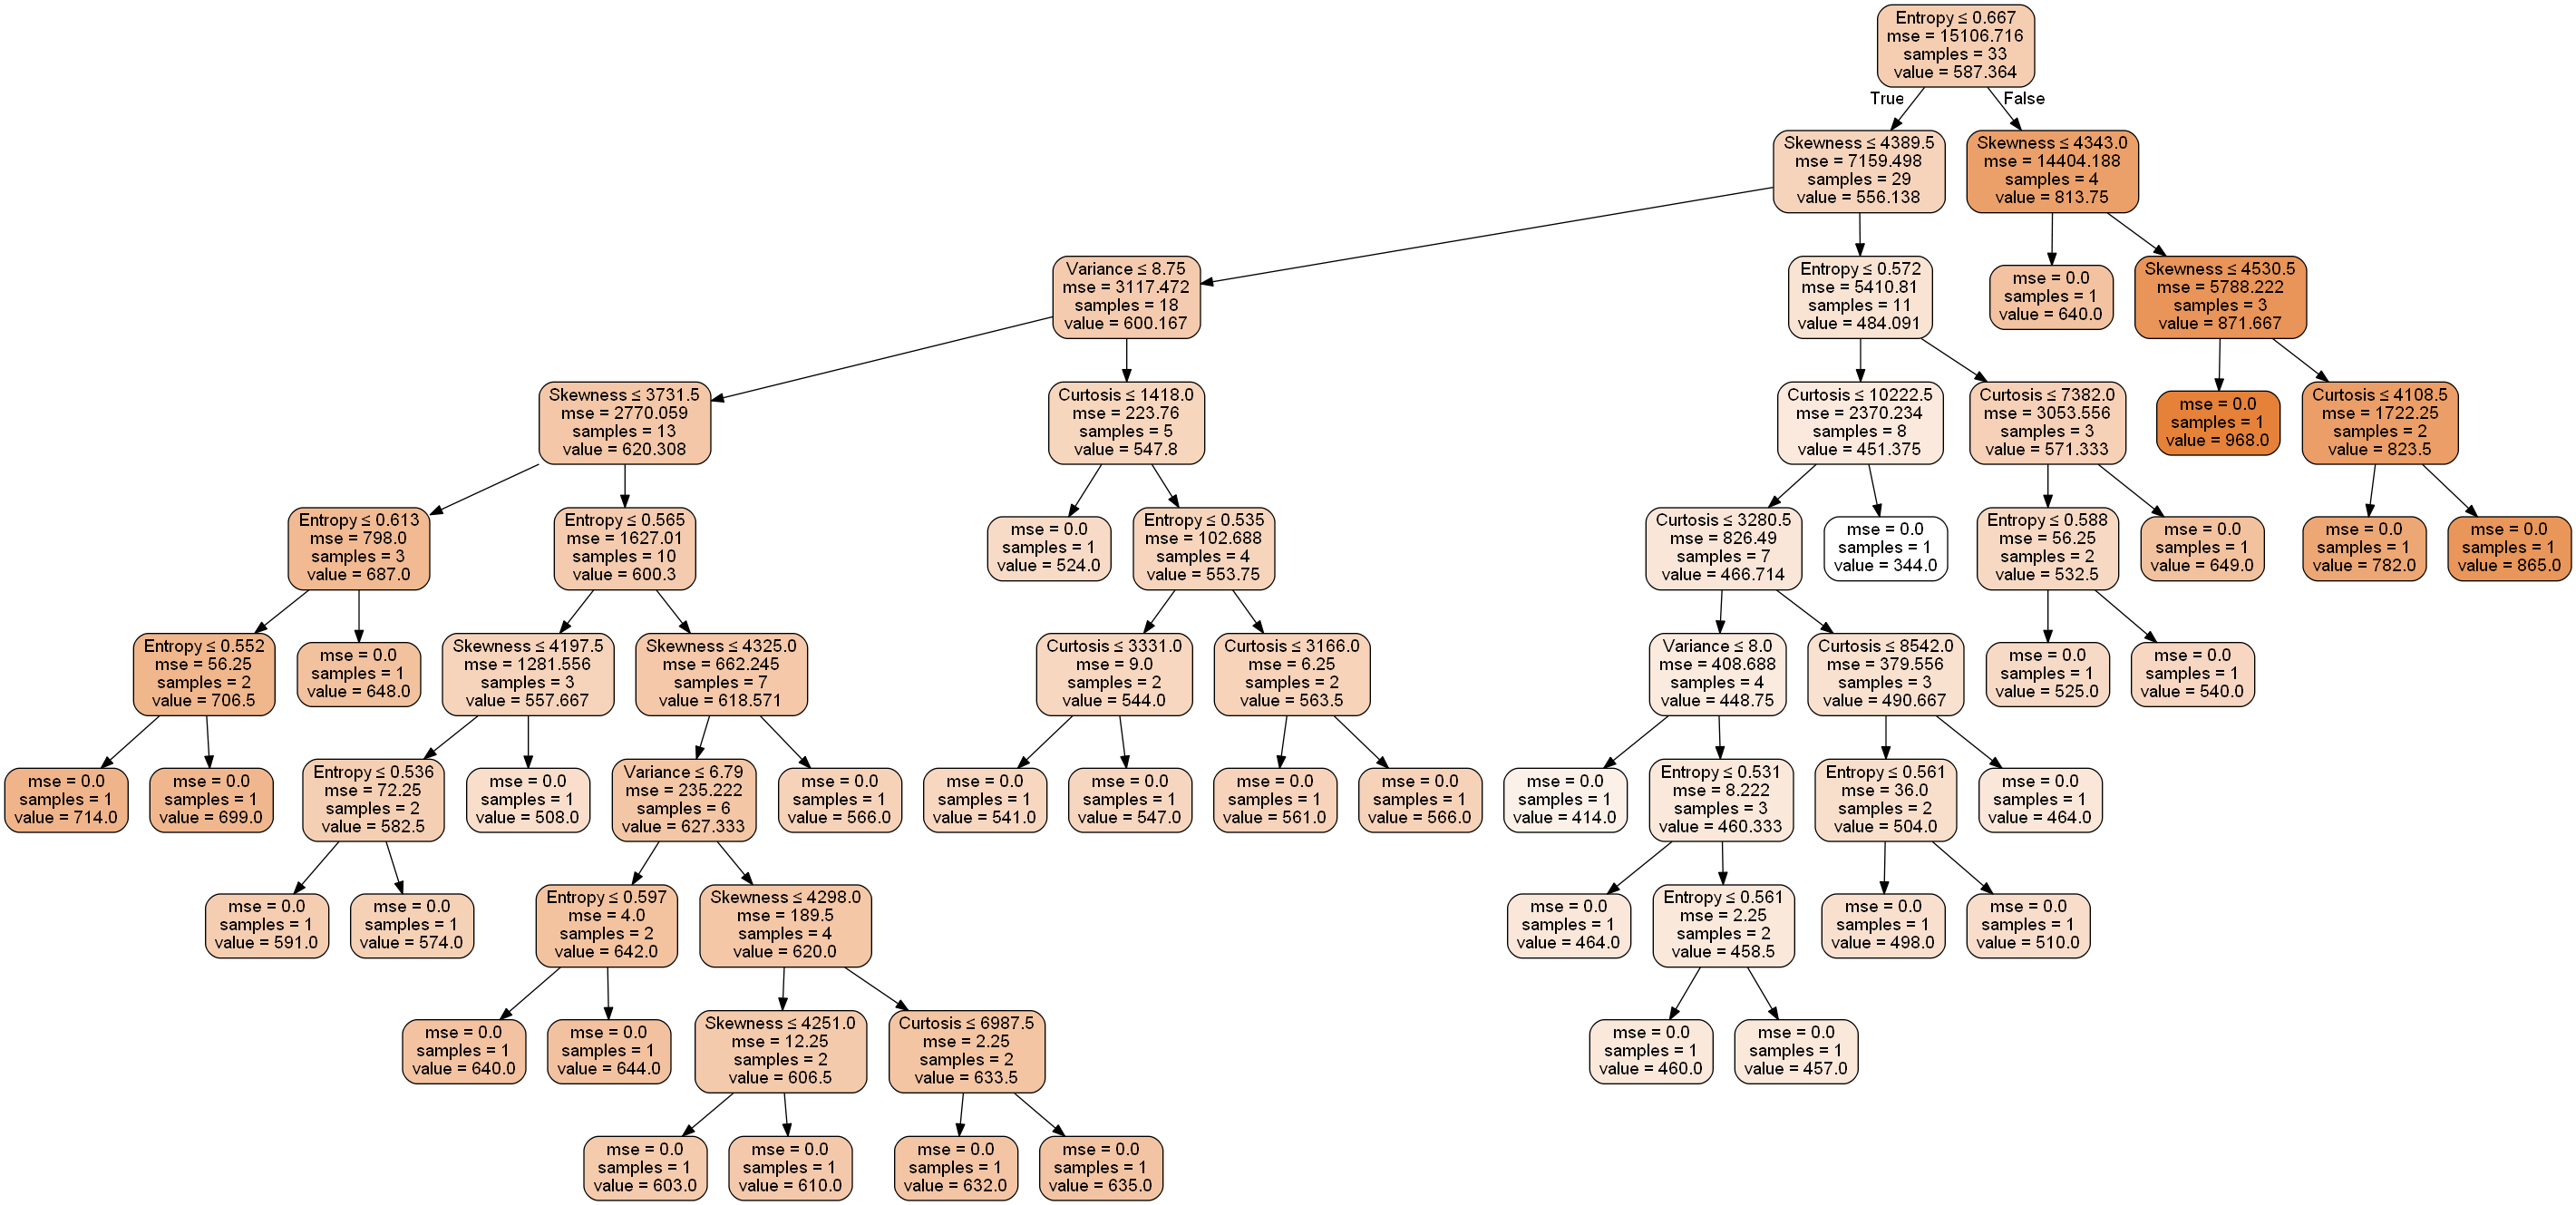

In [55]:
# Visualize the decision tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore2
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [57]:
# Evaluate the results of a regression is different from evaluate the results of a classification task
# As we have continous results, we can not use the confusion matrix
df2_aval = pd.DataFrame({'Real':y_test2, 'Previsto':y_pred_test2})

df2_aval

,Real,Previsto
29,534,547.0
4,410,414.0
26,577,714.0
30,571,714.0
32,577,699.0
37,704,603.0
34,487,714.0
40,587,540.0
7,467,414.0
10,580,498.0


In [58]:
# So we will use two widely used metrics in the market
# Mean Absolute Error (MAE)
# Root Mean Square Error (RMSE), this one being the most common
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_test2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)))

Mean Absolute Error: 97.0
Root Mean Squared Error: 113.51739954738217


In [59]:
# How to evaluate them?
# Do a comparision between the training and the test
print('MAE - Treinamento:', metrics.mean_absolute_error(y_train2, mod_arvore2.predict(x_train2)))

print('MAE - Teste:', metrics.mean_absolute_error(y_test2, y_pred_test2))

MAE - Treinamento: 0.0
MAE - Teste: 97.0


In [60]:
# Look into the test

print("A média do consumo de combustivel da base é:")
print(y_test2.mean())
print()
print("O percentual do MAE em relaçao a média da base: ")
print(round(metrics.mean_absolute_error(y_test2, y_pred_test2)/y_test2.mean()*100,2))

A média do consumo de de combustivel da base é:
553.4666666666667

O percentual do MAE em relaçao a média da base: 
17.53


In [61]:
# Reasonable number are those under 10%. In our case, the model could be better

In [62]:
# The accuracy of the model does not make sense because the target is not binary
print("Acuracia:",metrics.accuracy_score(y_test2, y_pred_test2))

Acuracia: 0.0


In [64]:
# Let's assume that I run and validate a test - so my variables have good predictive power.
# Where do I now extract my 'rule'? 
# Like: if variables A, B and C are at certain thresholds, do I buy or do I sell?
from sklearn.tree import export_text

regras = tree_rules = export_text(mod_arvore1, feature_names = list(x_train1.columns))

regras

'|--- Variance <= 0.31\n|   |--- Skewness <= 7.57\n|   |   |--- Variance <= -0.46\n|   |   |   |--- Curtosis <= 6.22\n|   |   |   |   |--- class: 1\n|   |   |   |--- Curtosis >  6.22\n|   |   |   |   |--- Skewness <= -4.67\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- Skewness >  -4.67\n|   |   |   |   |   |--- class: 0\n|   |   |--- Variance >  -0.46\n|   |   |   |--- Skewness <= 5.45\n|   |   |   |   |--- Curtosis <= 2.62\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- Curtosis >  2.62\n|   |   |   |   |   |--- Entropy <= 1.09\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- Entropy >  1.09\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |--- Skewness >  5.45\n|   |   |   |   |--- class: 0\n|   |--- Skewness >  7.57\n|   |   |--- Variance <= -4.84\n|   |   |   |--- class: 1\n|   |   |--- Variance >  -4.84\n|   |   |   |--- class: 0\n|--- Variance >  0.31\n|   |--- Curtosis <= -4.39\n|   |   |--- Variance <= 3.22\n|   |   |   |--- class: 1\n|   

In [65]:
regras2 = tree_rules = export_text(mod_arvore2, feature_names = list(x_train2.columns))

regras2

'|--- Population_Driver_licence(%) <= 0.67\n|   |--- Average_income <= 4389.50\n|   |   |--- Petrol_tax <= 8.75\n|   |   |   |--- Average_income <= 3731.50\n|   |   |   |   |--- Population_Driver_licence(%) <= 0.61\n|   |   |   |   |   |--- Population_Driver_licence(%) <= 0.55\n|   |   |   |   |   |   |--- value: [714.00]\n|   |   |   |   |   |--- Population_Driver_licence(%) >  0.55\n|   |   |   |   |   |   |--- value: [699.00]\n|   |   |   |   |--- Population_Driver_licence(%) >  0.61\n|   |   |   |   |   |--- value: [648.00]\n|   |   |   |--- Average_income >  3731.50\n|   |   |   |   |--- Population_Driver_licence(%) <= 0.56\n|   |   |   |   |   |--- Average_income <= 4197.50\n|   |   |   |   |   |   |--- Population_Driver_licence(%) <= 0.54\n|   |   |   |   |   |   |   |--- value: [591.00]\n|   |   |   |   |   |   |--- Population_Driver_licence(%) >  0.54\n|   |   |   |   |   |   |   |--- value: [574.00]\n|   |   |   |   |   |--- Average_income >  4197.50\n|   |   |   |   |   |   